<a href="https://colab.research.google.com/github//pawel717-SCGE/lab1/blob/master/lab1-SCGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<h1>
Szeregi czasowe, giełda, ekonomia</h1>
<h2>
Sprawozdanie z laboratorium
</h2>
</center>

<p style="text-align: right">
    <b><i>Wykonali:</i></b><br>
<i>Paweł Suchanicz</i><br>
<i>Elżbieta Dziedzic</i>
</p>

## Data-puzzle

Wczytujemy dane z pliku:

In [1]:
import pandas as pd
df_data_puzzle = pd.read_csv('data_puzzle.dat', header=None)
df_data_puzzle.head()

,0
0,12.0
1,12.0
2,3.0
3,0.0
4,0.0


In [2]:
df_data_puzzle.describe()

,0
count,43495.000000
mean,86.540016
std,79.702157
min,0.000000
25%,21.000000
50%,65.000000
75%,135.000000
max,503.000000


## Wykres danych

In [3]:
df_data_puzzle.plot(title="Wykres danych data_puzzle")

Z danych na wykresie widać, że przejawiają charakter okresowy.

## Logarytmiczne stopy zwrotu

Wyliczamy logarytmiczne stopy zwtotu jako logarytm z różnicy obecnej wartości i poprzedniej:

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


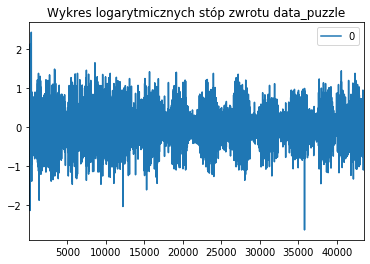

In [4]:
import numpy as np
data_puzzle_rets = np.log(df_data_puzzle / df_data_puzzle.shift(1))\
    .replace([np.inf, -np.inf], np.nan).dropna()
data_puzzle_rets.plot(title='Wykres logarytmicznych stóp zwrotu data_puzzle')

Na wykresie pojawiają się skupiska o podobnej szerokości.

#### Histogram
Nastepnie konstruujemy histogram logarytmicznych stóp zwrotu

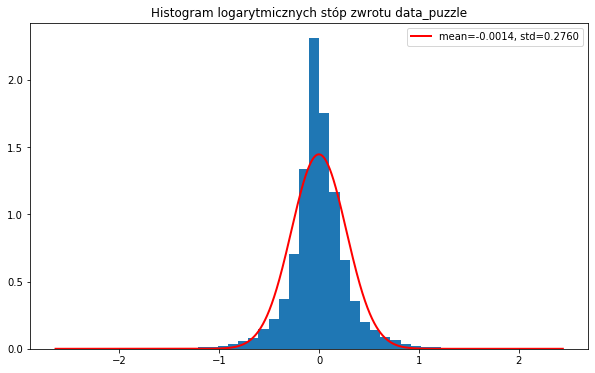

In [5]:
import scipy.stats as stats
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

loc, scale = stats.norm.fit(data_puzzle_rets[0]) 
x = np.linspace(data_puzzle_rets[0].min(), data_puzzle_rets[0].max(), len(data_puzzle_rets[0]))
pdf = stats.norm.pdf(x, loc=loc, scale=scale) 
label = 'mean=%.4f, std=%.4f' % (loc, scale)
ax.set_title("Histogram logarytmicznych stóp zwrotu data_puzzle")
ax.hist(data_puzzle_rets[0], bins=50, density=True)
ax.plot(x, pdf, 'r-', lw=2, label=label)
ax.legend(loc='best')

Na histogramie można zauważyć, że najwięcej wartości stóp zwrotu znajduje się około zera.

## Standaryzacja

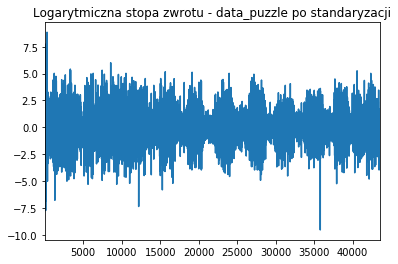

In [13]:
# funkcja do standryzacji
def standarize(sample):
    return (sample - sample.mean())/(sample.std())

data_puzzle_rets_standarized = standarize(data_puzzle_rets[0])
data_puzzle_rets_standarized.plot(title='Logarytmiczna stopa zwrotu - data_puzzle po standaryzacji')

#### Histogram

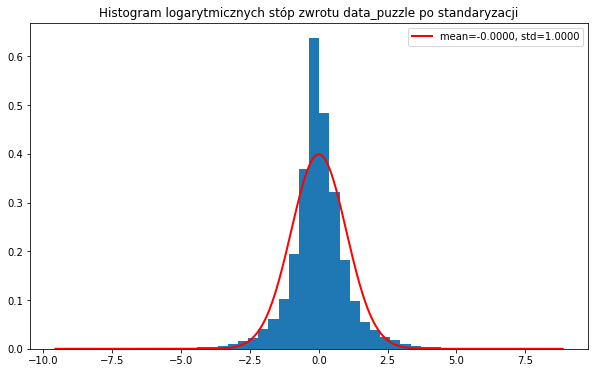

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

loc, scale = stats.norm.fit(data_puzzle_rets_standarized) 
x = np.linspace(data_puzzle_rets_standarized.min(),data_puzzle_rets_standarized.max(), len(data_puzzle_rets[0]))
pdf = stats.norm.pdf(x, loc=loc, scale=scale) 
label = 'mean=%.4f, std=%.4f' % (loc, scale)
ax.set_title("Histogram logarytmicznych stóp zwrotu data_puzzle po standaryzacji")
ax.hist(data_puzzle_rets_standarized, bins=50, density=True)
ax.plot(x, pdf, 'r-', lw=2, label=label)
ax.legend(loc='best')

Tworzymy także histogram z osią y w skali logarytmicznej.

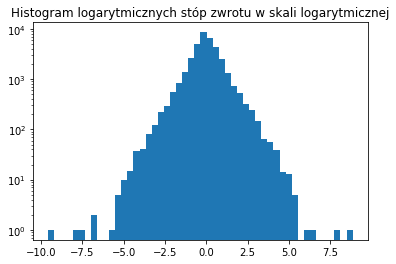

In [8]:
def plot_log_histogram(sample, title=''):
    plt.title(title)
    plt.yscale('log', nonposy='clip')
    count, bins, patches = plt.hist(sample, bins=50)
    plt.show()
    
plot_log_histogram(data_puzzle_rets_standarized, 'Histogram logarytmicznych stóp zwrotu w skali logarytmicznej')

## Dystrybuanta

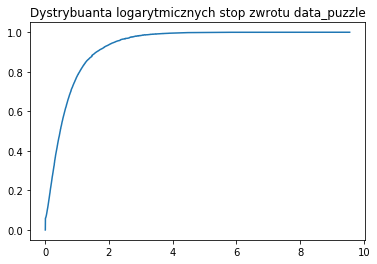

In [9]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(abs(data_puzzle_rets_standarized))
plt.plot(ecdf.x, ecdf.y)
plt.title('Dystrybuanta logarytmicznych stop zwrotu data_puzzle')
plt.show()

## Autokorelacja

Obliczamy autokorelację dla logarytmicznych stóp zwrotu oraz dla modułu z logarytmicznych stóp zwrotu i prezentujemy wykres poniżej:

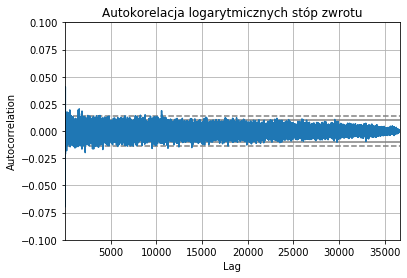

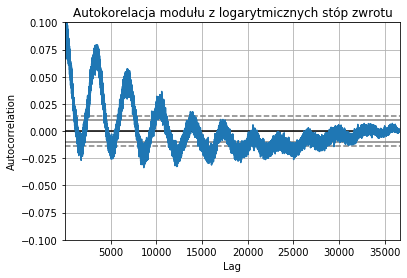

In [11]:
ax1 = pd.plotting.autocorrelation_plot(data_puzzle_rets_standarized)
ax1.set_ylim([-0.1, 0.1])
ax1.set_title("Autokorelacja logarytmicznych stóp zwrotu")
plt.show()
ax2 = pd.plotting.autocorrelation_plot(abs(data_puzzle_rets_standarized))
ax2.set_ylim([-0.1, 0.1])
ax2.set_title("Autokorelacja modułu z logarytmicznych stóp zwrotu")
plt.show()

Na wykresach widać, że pojawiają się wartości ujemne autokorelacji. Wartości ujemne autokrelecji występują gdy wartości bardzo niskie i wysokie sąsiadują że sobą.

## Transformata Fouriera

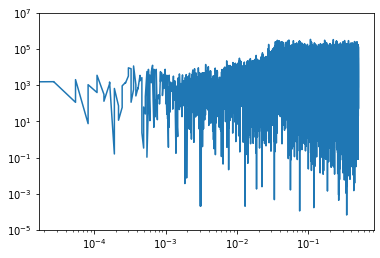

In [12]:
from scipy.fftpack import fft, rfft, fftfreq, rfftfreq

from sklearn import preprocessing

data_puzzle_fft = rfft(data_puzzle_rets_standarized)
plt.xscale('log')
plt.yscale('log')
fftfreq = rfftfreq(data_puzzle_rets_standarized.size)
plt.plot(fftfreq, data_puzzle_fft**2)
plt.ylim(10**(-5), 10**(7))
plt.show()
